In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA

In [29]:
class KMeansClustering:
    def __init__(self, num_clusters):
        self.K = num_clusters  # cluster number
        self.max_iterations = 100  # max iteration. don't want to run indefinitely
        self.plot_figure = True  # plot figure
        self.cluster_centers_ = None  # attribute to store cluster centers
        self.inertia_ = None  # attribute to store sum of squared distances within clusters

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, X.shape[1]))
        for k in range(self.K):
            centroid = X[np.random.choice(range(X.shape[0]))]
            centroids[k] = centroid
        return centroids

    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)
        return clusters

    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, X.shape[1]))
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(X.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
        plt.title('K-means Clustering (2D PCA)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

    def fit_predict(self, X):
        centroids = self.initialize_random_centroids(X)
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)
            diff = centroids - previous_centroids
            if not diff.any():
                break
        self.cluster_centers_ = centroids  # store cluster centers

        # Calculate the sum of squared distances within clusters
        self.inertia_ = sum(np.sum((X[cluster] - centroids[idx]) ** 2) for idx, cluster in enumerate(clusters))

        y_pred = self.predict_cluster(clusters, X)
        if self.plot_figure:
            self.plot_fig(X, y_pred)
        return y_pred




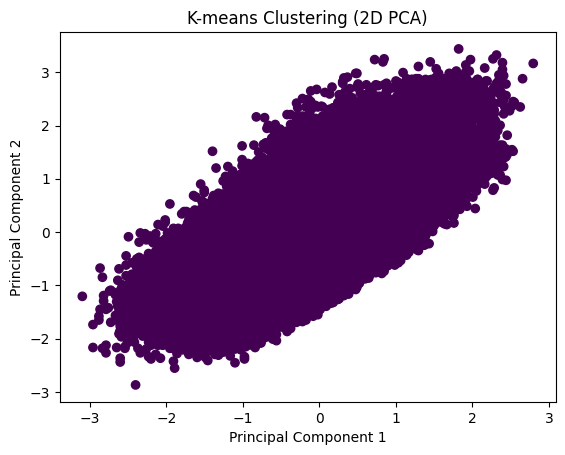

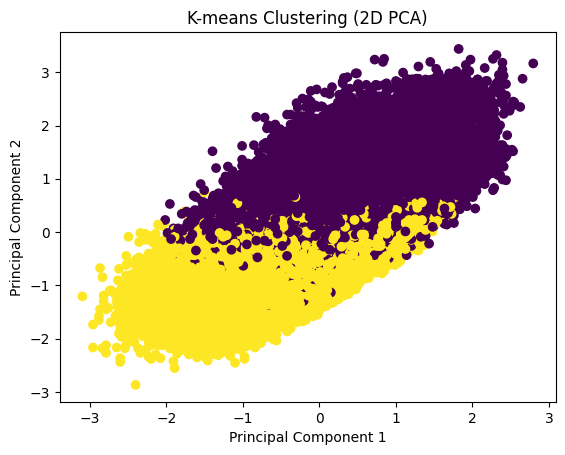

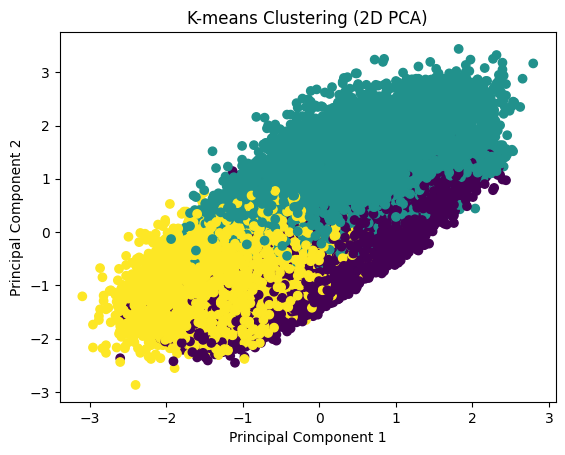

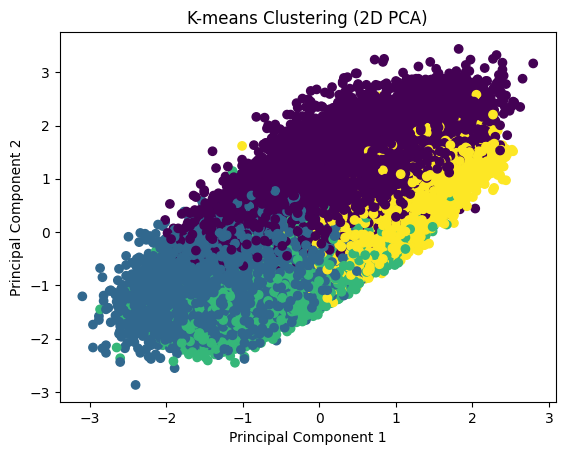

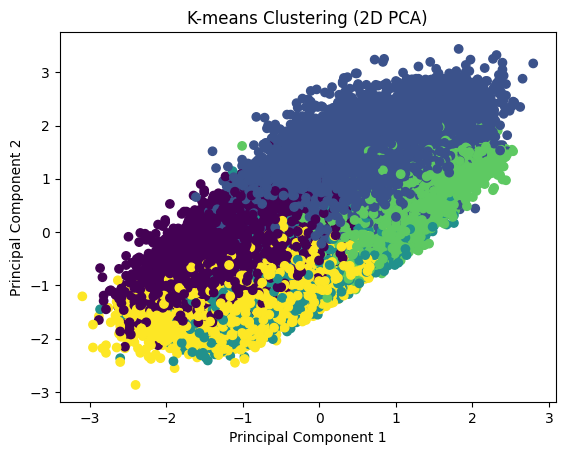

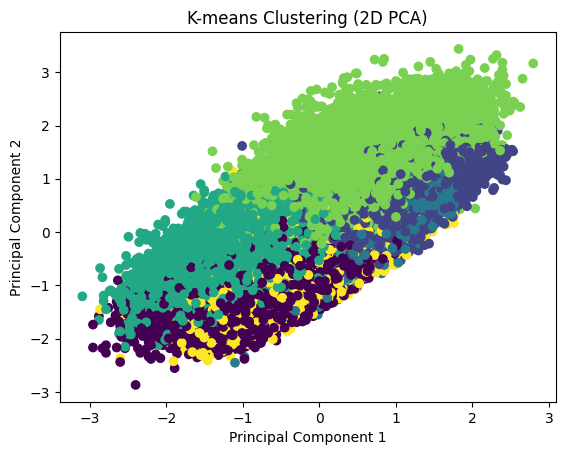

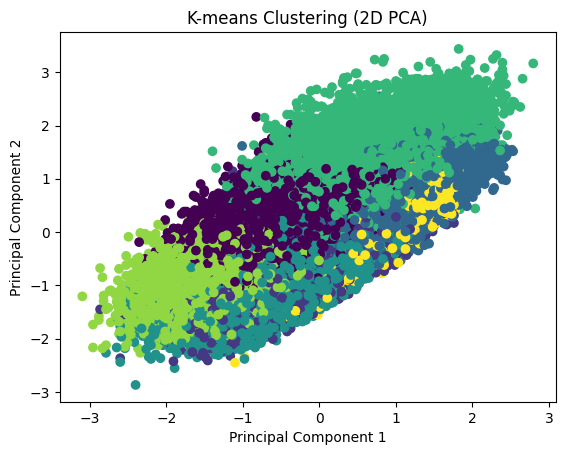

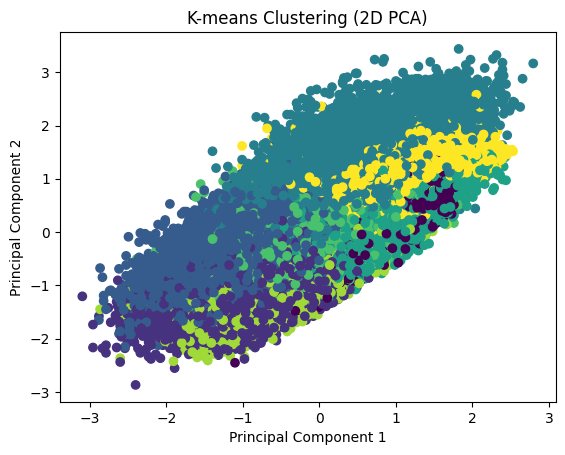

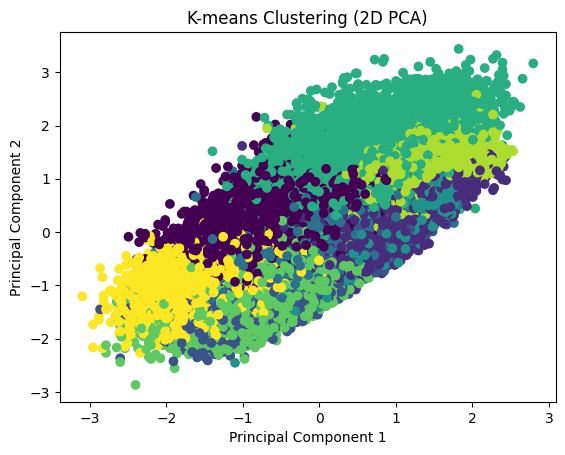

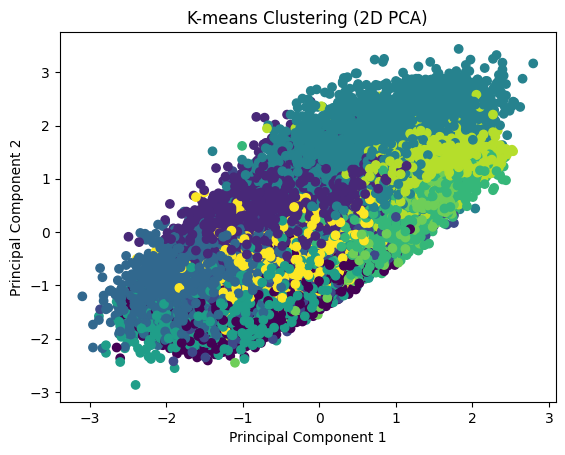

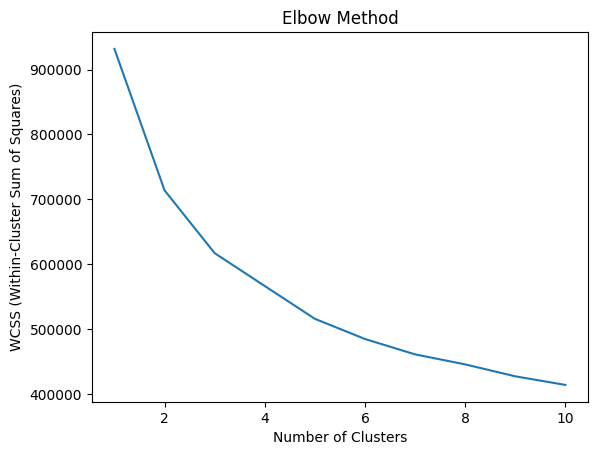

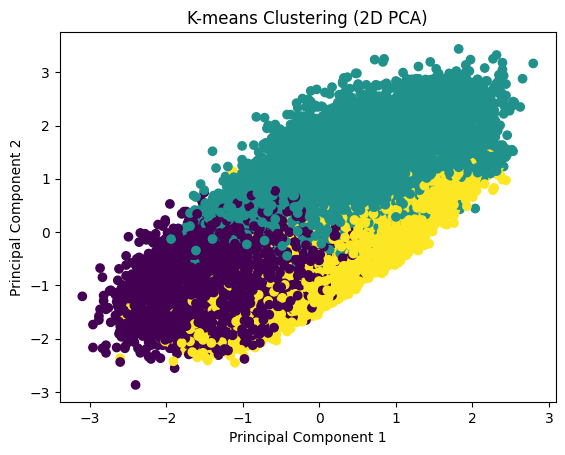

Cluster Centers:
[[-0.85291038 -0.72355974 -0.16966177 -0.63130805 -0.06893212 -0.57127121
  -0.43410417 -0.47590332  0.34916003  0.03034439  0.89443239  0.8967348
  -0.10825249 -0.09524744 -0.83648534 -0.67961006]
 [ 0.66288505  0.94371612 -0.22487499  0.75152269  0.72003166  0.0686022
   0.0680196   0.10392456 -0.67712106 -0.59591046 -0.34743824 -0.44554666
  -0.47131939 -0.49183102  0.8465344   0.94762178]
 [ 0.15629954 -0.39098656  0.52086352 -0.24246156 -0.90236289  0.62007227
   0.4493728   0.45233932  0.49308222  0.78020003 -0.64129867 -0.509482
   0.7824331   0.79433383 -0.11637313 -0.45129883]]
Sum of Squared Distances Within Clusters (Inertia): 616989.0338448007


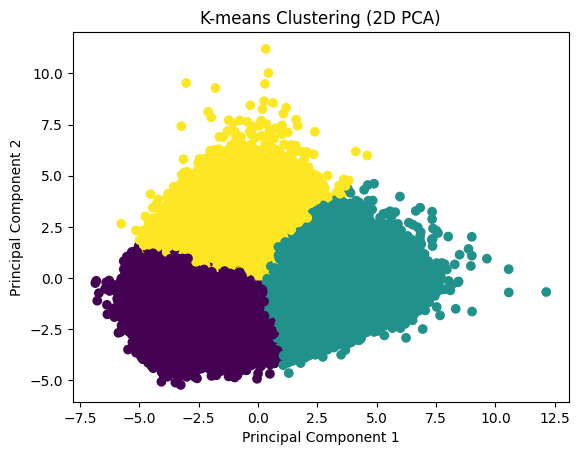

In [30]:
#Loading the data into a pandas DataFrame
df = pd.read_csv('weatherAUS.csv')

#Droping non-numeric columns and rows with missing values
numeric_df = df.select_dtypes(include=[np.number]).dropna()

#Standardize the data
numeric_df = (numeric_df - numeric_df.mean()) / numeric_df.std()

#Convert DataFrame to NumPy array
X = numeric_df.values

#Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeansClustering(num_clusters=i)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

#Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

#Based on the elbow method
num_clusters = 3

#Fit K-means with the optimal number of clusters
kmeans = KMeansClustering(num_clusters=num_clusters)
numeric_df['Cluster'] = kmeans.fit_predict(X)

#Print out the cluster centers and inertia
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("Sum of Squared Distances Within Clusters (Inertia):", kmeans.inertia_)

#Use PCA for visualization
pca = PCA(n_components=2)
numeric_df_pca = pca.fit_transform(numeric_df.drop('Cluster', axis=1))

#Plot the clusters in 2D space
plt.scatter(numeric_df_pca[:, 0], numeric_df_pca[:, 1], c=numeric_df['Cluster'], cmap='viridis')
plt.title('K-means Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

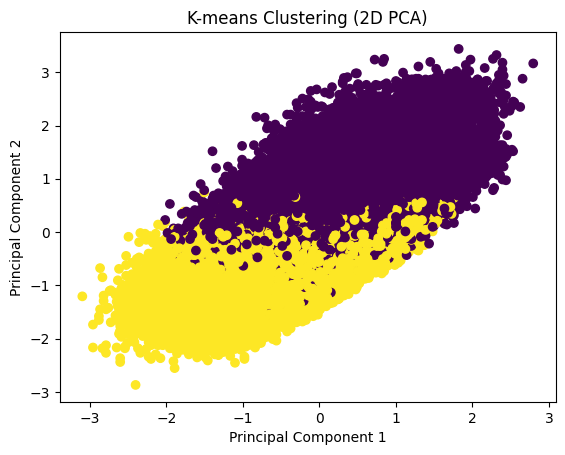

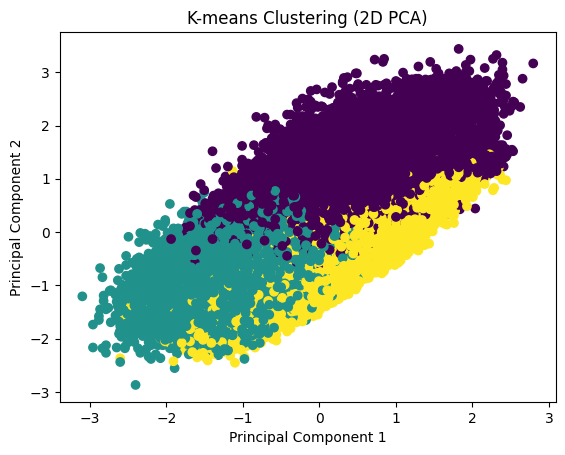

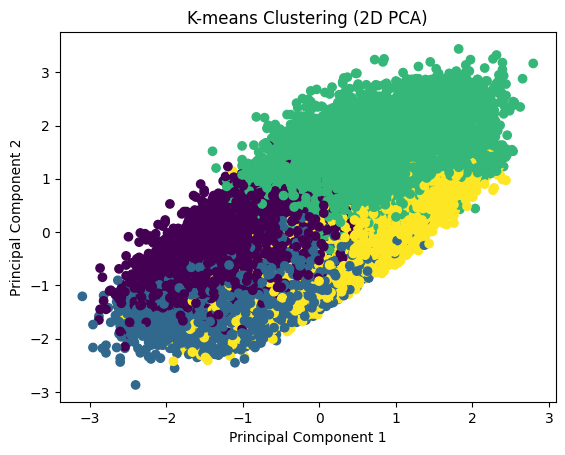

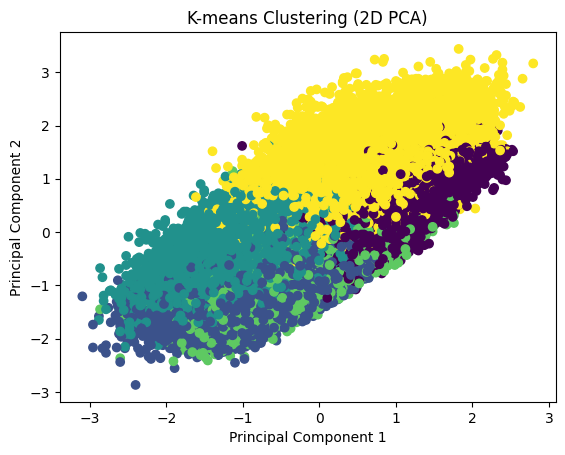

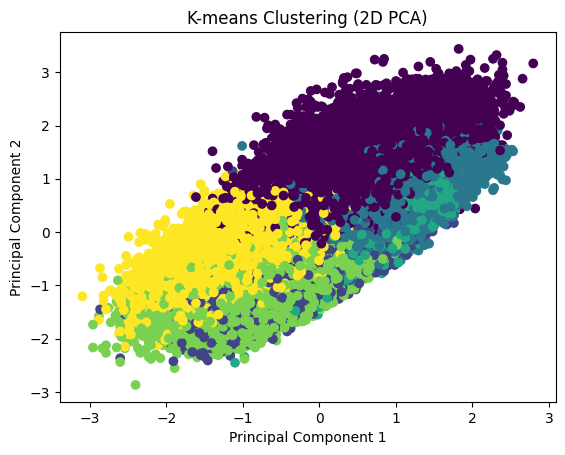

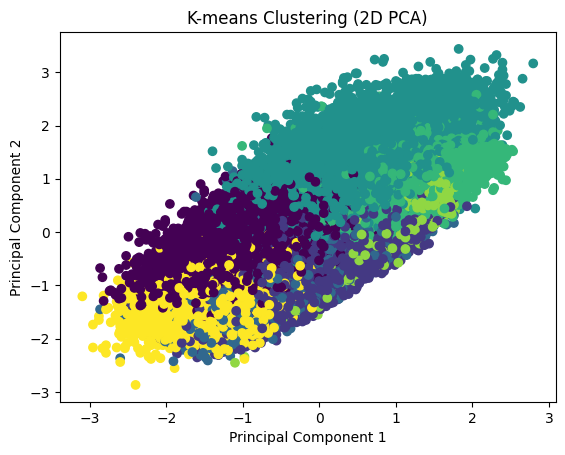

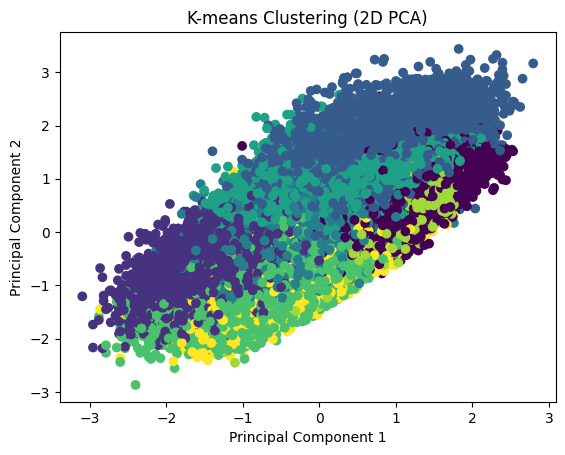

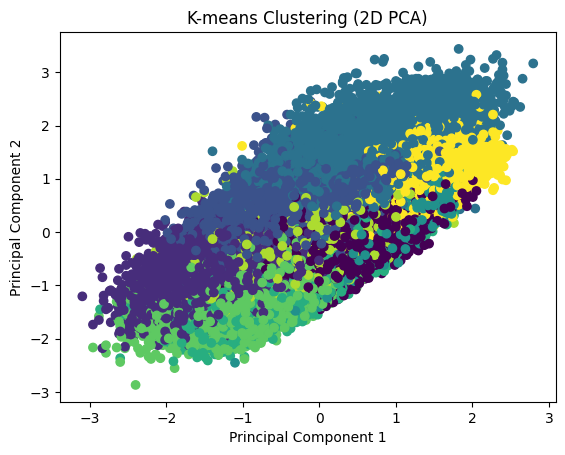

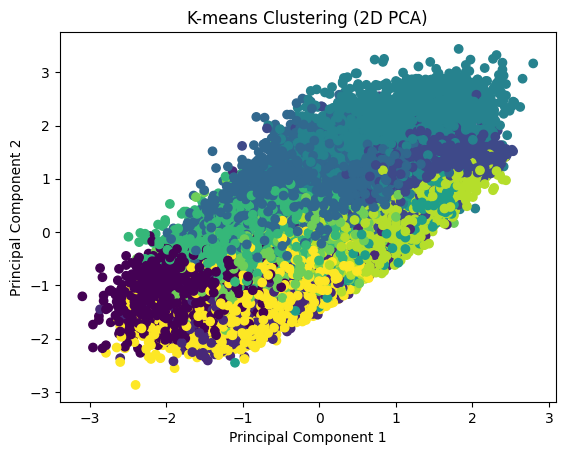

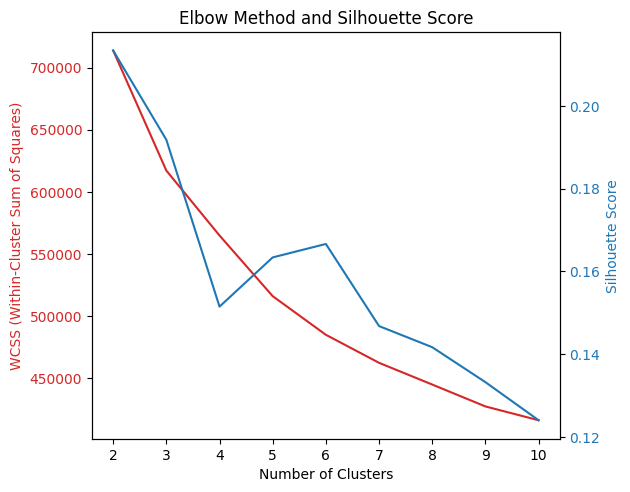

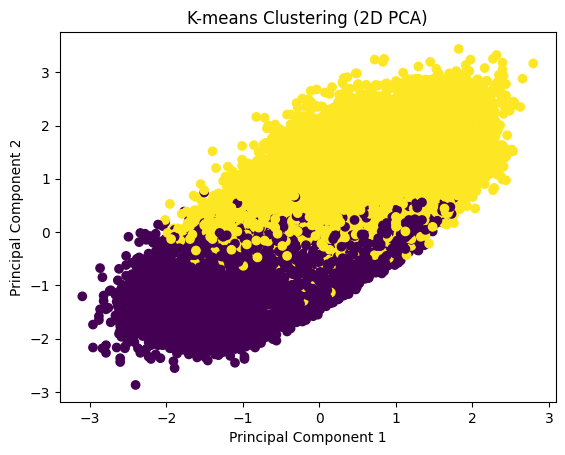

Cluster Centers (Silhouette):
[[-0.59687319 -0.75272291  0.08566761 -0.57444108 -0.46118927 -0.13033631
  -0.10000015 -0.14113501  0.47504777  0.37578011  0.37294335  0.44058337
   0.27453819  0.29100288 -0.71065229 -0.74453369]
 [ 0.64961276  0.81923331 -0.09323718  0.62519855  0.50193984  0.1418528
   0.10883614  0.15360567 -0.51702288 -0.40898395 -0.40589653 -0.47951321
  -0.29879631 -0.31671583  0.77344535  0.8103205 ]]
Silhouette Score: 0.21336126078996268


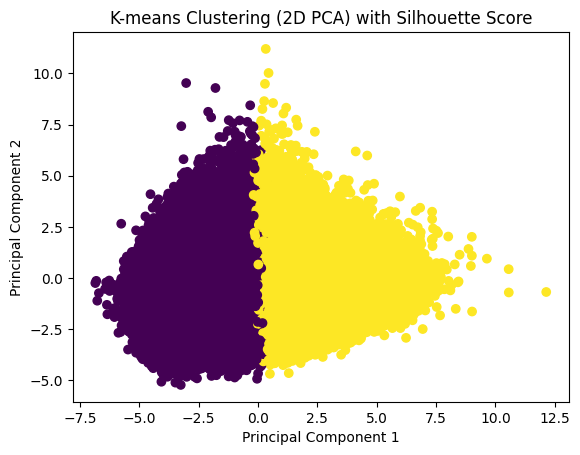

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

class KMeansClustering:
    def __init__(self, num_clusters):
        self.K = num_clusters  # cluster number
        self.max_iterations = 100  # max iteration. don't want to run indefinitely
        self.plot_figure = True  # plot figure
        self.cluster_centers_ = None  # attribute to store cluster centers
        self.inertia_ = None  # attribute to store sum of squared distances within clusters
        self.silhouette_score_ = None  # attribute to store silhouette score

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, X.shape[1]))
        for k in range(self.K):
            centroid = X[np.random.choice(range(X.shape[0]))]
            centroids[k] = centroid
        return centroids

    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)
        return clusters

    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, X.shape[1]))
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(X.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
        plt.title('K-means Clustering (2D PCA)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

    def fit_predict(self, X):
        centroids = self.initialize_random_centroids(X)
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)
            diff = centroids - previous_centroids
            if not diff.any():
                break
        self.cluster_centers_ = centroids  # store cluster centers

        # Calculate the sum of squared distances within clusters
        self.inertia_ = sum(np.sum((X[cluster] - centroids[idx]) ** 2) for idx, cluster in enumerate(clusters))

        # Calculate the silhouette score
        self.silhouette_score_ = silhouette_score(X, self.predict_cluster(clusters, X))

        y_pred = self.predict_cluster(clusters, X)
        if self.plot_figure:
            self.plot_fig(X, y_pred)
        return y_pred

# Load your data into a pandas DataFrame
# Replace 'weatherAUS.csv' with the actual filename
df = pd.read_csv('weatherAUS.csv')

# Drop non-numeric columns and rows with missing values
numeric_df = df.select_dtypes(include=[np.number]).dropna()

# Standardize the data
numeric_df = (numeric_df - numeric_df.mean()) / numeric_df.std()

# Convert DataFrame to NumPy array
X = numeric_df.values

# Find the optimal number of clusters using the elbow method
wcss = []
silhouette_scores = []
for i in range(2, 11):  # Starting from 2 clusters as silhouette score is not defined for a single cluster
    kmeans = KMeansClustering(num_clusters=i)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(kmeans.silhouette_score_)

# Plot the elbow curve
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS (Within-Cluster Sum of Squares)', color=color)
ax1.plot(range(2, 11), wcss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, 11), silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Elbow Method and Silhouette Score')
plt.show()

# Based on the silhouette score
optimal_clusters_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

# Fit K-means with the optimal number of clusters using silhouette score
kmeans_silhouette = KMeansClustering(num_clusters=optimal_clusters_silhouette)
numeric_df['Cluster_Silhouette'] = kmeans_silhouette.fit_predict(X)

# Print out the cluster centers and silhouette score
print("Cluster Centers (Silhouette):")
print(kmeans_silhouette.cluster_centers_)
print("Silhouette Score:", kmeans_silhouette.silhouette_score_)

# Use PCA for visualization
pca = PCA(n_components=2)
numeric_df_pca = pca.fit_transform(numeric_df.drop('Cluster_Silhouette', axis=1))

# Plot the clusters in 2D space
plt.scatter(numeric_df_pca[:, 0], numeric_df_pca[:, 1], c=numeric_df['Cluster_Silhouette'], cmap='viridis')
plt.title('K-means Clustering (2D PCA) with Silhouette Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
